# Introduction to OpenCV using Python

In this file we read and check properties of an image and then apply a mask to select a certain color.

In [21]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

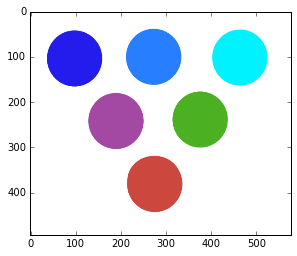

In [22]:
# read image
img = cv2.imread('circles.png')
# show image
plt.imshow(img)
plt.show()

## Channels in OpenCV and Matplotlib

There is a difference between OpenCV and Matplotlib in the way they work with channels. While Matplotlib works with RGB channels (RED-BLUE-GREEN respectively), OpenCV works with BGR channels (BLUE-GREEN-RED respectively). Thus, in order to show the image as it is, we first have to change the order of the channels.

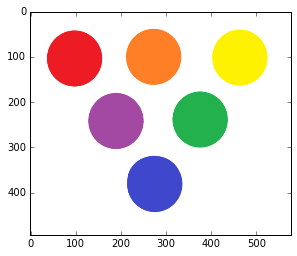

In [23]:
def show_rgb(img):
    # Change the order of the channels
    rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgbimg)
    plt.show()
    
show_rgb(img)

## Verifying image properties

Using OpenCV we can access the image properties such as number of channels, size of the image and color depth.

In [24]:
print 'Shape of the image (width, height, channels): ', img.shape

#split the image into different channels
channels = cv2.split(img)
for i, ch in enumerate(channels):
    print 'Minimum value of the channel %d: %d' % (i, np.amin(ch))
    print 'Maximum value of the channel %d: %d' % (i, np.amax(ch))
    print 

print 'Color depth of the image', type(np.amin(ch))

Shape of the image (width, height, channels):  (494, 576, 3)
Minimum value of the channel 0: 0
Maximum value of the channel 0: 255

Minimum value of the channel 1: 17
Maximum value of the channel 1: 255

Minimum value of the channel 2: 22
Maximum value of the channel 2: 255

Color depth of the image <type 'numpy.uint8'>


## Verifying the brightness of each channel

Checking the brightness can give us an idea of how colors are composed.

Original image


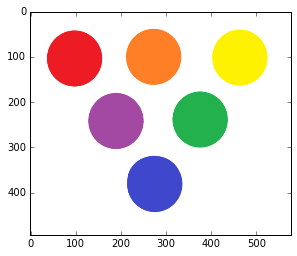

Channel:  BLUE


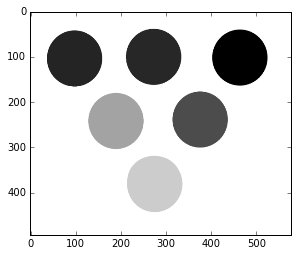

Channel:  GREEN


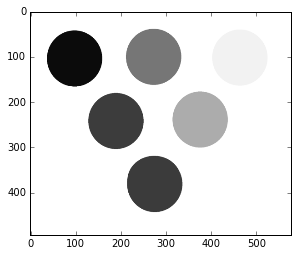

Channel:  RED


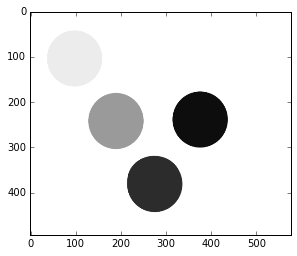

In [25]:
print 'Original image'
show_rgb(img)

ch_names = ['BLUE', 'GREEN', 'RED']
channels = cv2.split(img)
for i, ch in enumerate(channels):
    print 'Channel: ', ch_names[i]
    plt.imshow(ch, cmap='gray')
    plt.show()

## Defining colors in color spaces

In order to identify a certain color, we can transform the RGB channels into HSV channels, obtaining HUE, SATURATION AND VALUE. Having the hue channel, we can select the color we want to by varying its value. As OpenCV works with an HSV space of 180 degrees, we select 179 (-10, +10) to the red color, 118 (-10, +10) to the blue color and so on.

In [26]:
def standard_colors(color):
    """ method to return an array of HSV values to each color
        `lower` means the lowest value of our color and `high`
        is the highest value to our color.
    """
    color = color.lower()
    if color == 'red':
        lower = np.array([169, 100, 100])
        upper = np.array([189, 255, 255])
    elif color == 'blue':
        lower = np.array([108, 100, 100])
        upper = np.array([128, 255, 255])
    elif color == 'green':
        lower = np.array([60, 100, 100])
        upper = np.array([80, 255, 255])
    elif color == 'orange':
        lower = np.array([5, 100, 100])
        upper = np.array([15, 255, 255])
    elif color == 'purple':
        lower = np.array([140, 100, 100])
        upper = np.array([160, 255, 255])
    elif color == 'yellow':
        lower = np.array([20, 100, 100])
        upper = np.array([40, 255, 255])
    else:
        lower = None
        upper = None
    lower.astype(np.uint8)
    upper.astype(np.uint8)
    return lower, upper

## Creating the mask to our image

We select a color by its name and calls `standard_colors` to get the lowest and highest values of HSV to our color. Then, we apply the `inRange` function to get a mask containing only elements with our selected color. The mask is binary where pixels that our color appear contain 1 value and pixels where it does not appear contain 0 value.  

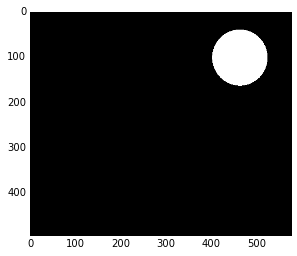

In [27]:
COLOR = 'yellow'
lower, upper = standard_colors(COLOR)

# change to HSV channels
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# get mask to our COLOR
mask = cv2.inRange(hsv, lower, upper)

#check mask
plt.imshow(mask, cmap='gray')
plt.show()

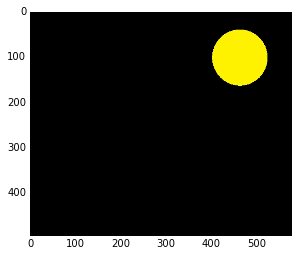

In [28]:
# perform element wise AND between my image and the mask
# this operation will keep in the original image only elements
# with my selected color
masked = cv2.bitwise_and(img, img, mask=mask)
show_rgb(masked)